In [51]:
import librosa

SAMPLE_1_FILE = 'data/sample1.wav'
SAMPLE_2_FILE = 'data/sample2.wav'

filename = librosa.example('nutcracker')

ParameterError: Unknown example key: data/sample1.wav

In [7]:
print(filename)

/Users/home/Library/Caches/librosa/Kevin_MacLeod_-_P_I_Tchaikovsky_Dance_of_the_Sugar_Plum_Fairy.ogg


In [56]:
# y, sr = librosa.load(filename)
y, sr = librosa.load(SAMPLE_1_FILE)

print('waveform (y): ', type(y), len(y))
print(f'sampling rate {sr}')

waveform (y):  <class 'numpy.ndarray'> 79460
sampling rate 22050


In [57]:
# beat tracker
tempo, beat_frames = librosa.beat.beat_track(y, sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 107.67 beats per minute


In [58]:
# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_times

array([0.48761905, 1.04489796, 1.60217687])

In [59]:
# https://www.analyticsvidhya.com/blog/2021/06/visualizing-sounds-librosa/

%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
x = np.linspace(-np.pi, np.pi, 201)

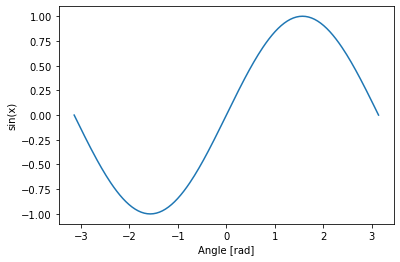

In [60]:
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [61]:
# Short-Tiem Fourier Transform
D = librosa.stft(y)
s = np.abs(librosa.stft(y)**2) # Get magnitude of stft

In [62]:
# Chroma is a 12-element vector that measures energy from the sound pitch.
chroma = librosa.feature.chroma_stft(S=s, sr=sr)
chroma.shape

(12, 156)

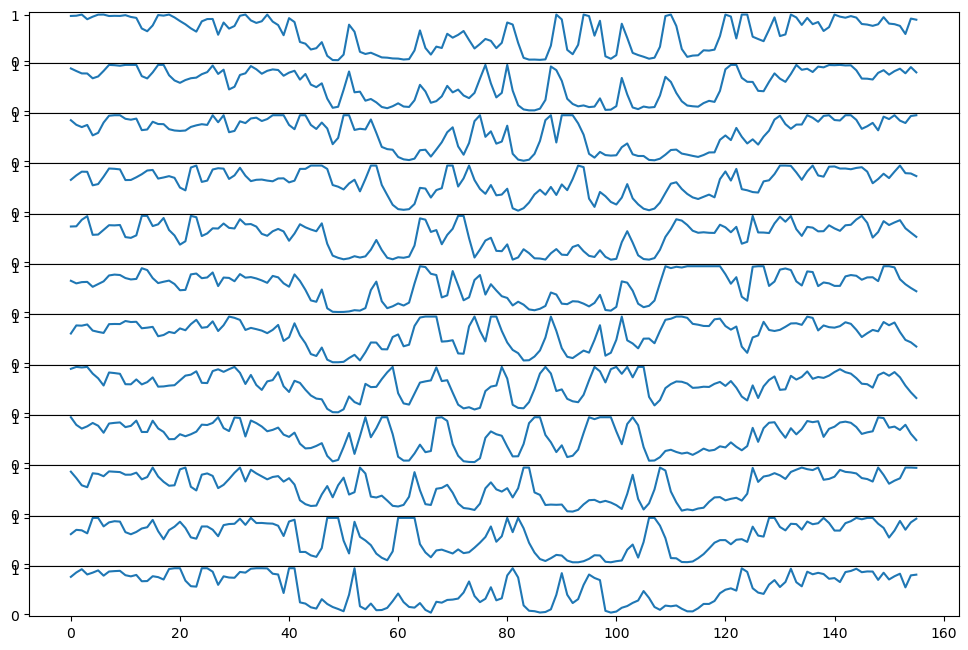

<Figure size 900x1200 with 0 Axes>

In [63]:
%matplotlib inline

# increase figure size
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

features = chroma.shape[0]

fig = plt.figure()
gs = fig.add_gridspec(features, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

for i in range(features):
    axs[i].plot(chroma[i].transpose()[:1000])

plt.figure(figsize=(9,12))
plt.show()

In [64]:
chroma_sum = np.cumsum(chroma) 
chroma_sum.shape

(1872,)

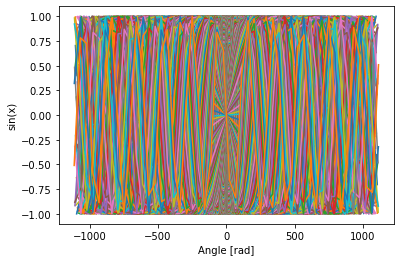

In [65]:
%matplotlib inline
x = np.linspace(-chroma_sum, chroma_sum)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [66]:
from librosa.display import specshow

In [69]:
# enhanced Chroma and Chroma variants

# Constant-Q, type of graph to visualize chroma measurements, uses logartihmically spaced frquency axis
# to display sound in decibels
chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_orig.shape

(12, 156)

[Text(0, 0.5, 'Default chroma')]

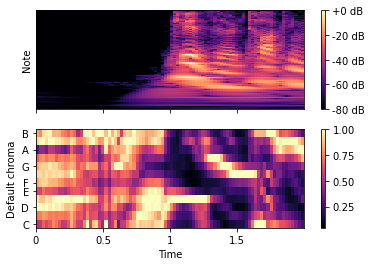

In [70]:
# For display purposes, let's zoom in on a 15-second chunk from the middle of the song
start = 0
end = 2
idx = tuple([slice(None), slice(*list(librosa.time_to_frames([start, end])))])
# And for comparison, we'll show the CQT matrix as well.
C = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=12*3, n_bins=7*12*3))
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = specshow(librosa.amplitude_to_db(C, ref=np.max)[idx],
                                y_axis='cqt_note', x_axis='time', bins_per_octave=12*3,
                                ax=ax[0])

fig.colorbar(img1, ax=[ax[0]], format="%+2.f dB")
ax[0].label_outer()
img2 = specshow(chroma_orig[idx], y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Default chroma')